1. what is the max age of the male and female ? i will write some code to answer this quistion.
2. i want to know how many survivors in Survived column ? 
3. who are most likely to survive the male or female ? while the value for the survivors is 1, simply i can sum the column, and creat histogram for died and survived.

In [113]:
import pandas as pd

In [114]:
import numpy as np

In [115]:
df = pd.read_csv('train.csv')

In [116]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [117]:
df.groupby('Sex').max()['Age']

Sex
female    63.0
male      80.0
Name: Age, dtype: float64

In [118]:
y = df['Survived']

In [119]:
y.sum()

342L

In [120]:
vertical = [342, 549]
survived = ('survived', 'died')
x_pos = np.arange(len(survived))

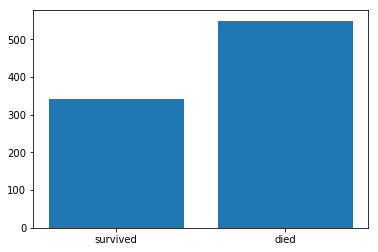

In [121]:
plt.bar(x_pos, vertical)
plt.xticks(x_pos, survived)
plt.show()

communication:
unfortunately, the dead more than the survivors.

In [122]:
sex_sum = df.groupby('Sex').sum()
sex_sum

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,135343,233,678,7286.00,218,204,13966.6628
male,262043,109,1379,13919.17,248,136,14727.2865


since we are interested in sex and survived coulmn i will drop the others, and create histogram.

In [123]:
drop_columns = df.drop(['Pclass', 'Age', 'SibSp', 'Name', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis=1)
drop_columns.head

<bound method DataFrame.head of      PassengerId  Survived     Sex      Fare
0              1         0    male    7.2500
1              2         1  female   71.2833
2              3         1  female    7.9250
3              4         1  female   53.1000
4              5         0    male    8.0500
5              6         0    male    8.4583
6              7         0    male   51.8625
7              8         0    male   21.0750
8              9         1  female   11.1333
9             10         1  female   30.0708
10            11         1  female   16.7000
11            12         1  female   26.5500
12            13         0    male    8.0500
13            14         0    male   31.2750
14            15         0  female    7.8542
15            16         1  female   16.0000
16            17         0    male   29.1250
17            18         1    male   13.0000
18            19         0  female   18.0000
19            20         1  female    7.2250
20            21       

In [124]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

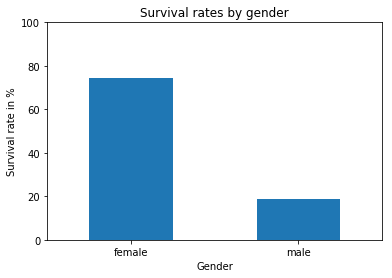

In [129]:
sur_rates = df.groupby('Sex')['Survived'].mean()*100

ax = sur_rates.plot.bar()
ax.set(title='Survival rates by gender',
      xlabel='Gender', ylabel='Survival rate in %',
      ylim=[0,100])
ax.set_xticklabels(ax.get_xmajorticklabels(), rotation=0);

Communication :
it's looks like the female more likely to survive than the female.

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


as we can see above there are three missing values in Age, Cabin and Embarked.

In [136]:
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

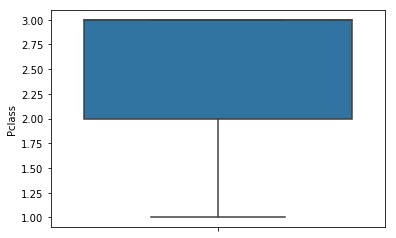

In [134]:
sns.boxplot(y=df['Pclass'])

communication:
    i made a variable of Pclass and i created a one nummerical variable.

conclusions :
as we see above, the result of my analysis is the male more than female traveler, but the female are most likely to survive by rating. In addition, this dataset does not contain information on all passengers.